# 根据all_tweets产生的数据结果进行分析

In [32]:
from my_weapon import *
from collections import defaultdict, Counter
from IPython.display import display
from tqdm import tqdm_notebook as tqdm
import matplotlib
from datetime import datetime

matplotlib.rcParams["font.size"] = 14
sns.set(style="darkgrid", font_scale=1.5)
ira_c = sns.color_palette("coolwarm", 8)[7]
all_c = sns.color_palette("coolwarm", 8)[0]

In [33]:
print("loading all tweets_csv ...")
%time all_tweets = pd.read_csv("disk/all-tweets.csv", dtype=str)
# all_tweets = all_tweets.astype(
#     {"is_IRA": int, "is_source": int, "dt": datetime})
all_tweets = all_tweets.astype({"is_IRA": int, "is_source": int})
print("finished!")

loading all tweets_csv ...
CPU times: user 1min 12s, sys: 3.94 s, total: 1min 16s
Wall time: 1min 16s
finished!


In [59]:
all_tweets = all_tweets[(all_tweets.c_alex != "-1") | (all_tweets.c_sci_f != "-1")]

In [ ]:
for i, row in tqdm(all_tweets.iterrows()):
    if row["c_sci_f"] != "-1":
        all_tweets.loc[i, "c_alex"] == "fake"

In [60]:
len(all_tweets)

35675331

In [34]:
len(all_tweets[all_tweets.is_source==1])

13453040

In [52]:
ira_tweets = all_tweets[all_tweets.is_IRA==1]

In [37]:
fake_tweets = all_tweets[all_tweets.c_alex=="fake"]

In [38]:
print(len(fake_tweets[(fake_tweets.is_IRA==1) & (fake_tweets.is_source==1)]), \
len(fake_tweets[(fake_tweets.is_IRA==1) & (fake_tweets.is_source==0)]))

print(len(fake_tweets[(fake_tweets.is_IRA==0) & (fake_tweets.is_source==1)]), \
len(fake_tweets[(fake_tweets.is_IRA==0) & (fake_tweets.is_source==0)]))

363 1297
1135214 2178669


In [40]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)"
]

left leaning            8518070
center                  6938350
left                    4738758
right                   4553689
extreme bias (right)    4459235
fake                    3315543
right leaning           1169747
extreme bias (left)      644608
Name: c_alex, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

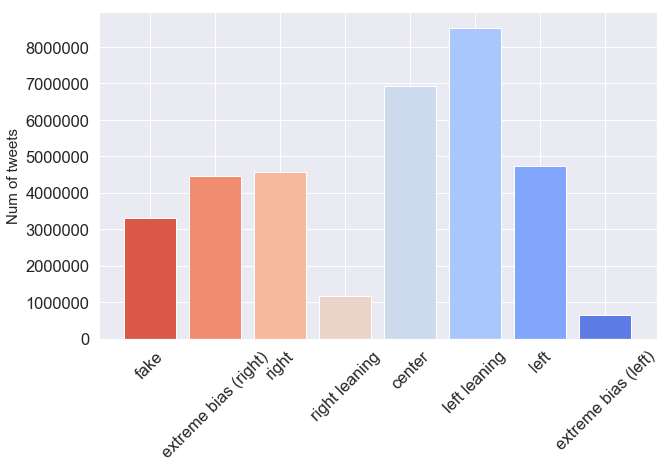

In [55]:
sns.set_style("darkgrid")
sns.set_palette("coolwarm_r", n_colors=8)

tweets = all_tweets[all_tweets.c_alex!="-1"]
# media_type_counts = tweets["c_alex"].value_counts(normalize=True)
media_type_counts = tweets["c_alex"].value_counts()
display(media_type_counts)

plt.figure(figsize=(10, 6))
x = range(len(media_type_counts))

for i in x:
    plt.bar(i, media_type_counts[labels[i]])
    
plt.xticks(x, [labels[i] for i in x])
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('Num of tweets', fontsize=15)
plt.xticks(rotation=45)
# plt.yticks(fontsize=14)

# plt.savefig("fig/size-of-intersection500.pdf", dpi=300, bbox_inches='tight')

left leaning            5578
right                   5273
center                  4274
extreme bias (right)    2882
left                    2403
right leaning           2164
fake                    1660
extreme bias (left)      110
Name: c_alex, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

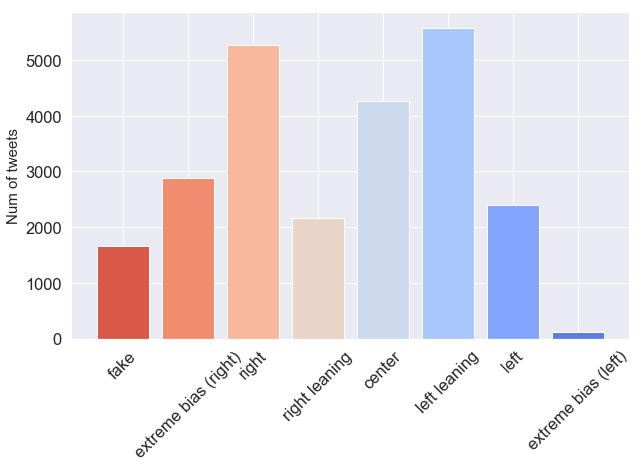

In [57]:
tweets = ira_tweets[ira_tweets.c_alex!="-1"]
# media_type_counts = tweets["c_alex"].value_counts(normalize=True)
media_type_counts = tweets["c_alex"].value_counts()
display(media_type_counts)

plt.figure(figsize=(10, 6))
x = range(len(media_type_counts))

for i in x:
    plt.bar(i, media_type_counts[labels[i]])
    
plt.xticks(x, [labels[i] for i in x])
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('Num of tweets', fontsize=15)
plt.xticks(rotation=45)
# plt.yticks(fontsize=14)

# plt.savefig("fig/size-of-intersection500.pdf", dpi=300, bbox_inches='tight')

## 一旦考虑到science上面的fake news类别，会不会增加数据量呢？

In [49]:
len(all_tweets[(all_tweets.c_sci_f!="-1") & (all_tweets.c_alex!="-1")])

4952276

In [50]:
len(all_tweets[(all_tweets.is_IRA==1) & (all_tweets.c_sci_f!="-1") & (all_tweets.c_alex!="fake")])

2193

考虑到c_sci_f后，总体增加4952276，IRA增加2193

## IRA作为源，或者参与到其中的消息是否更加爆炸？

In [21]:
ira_as_source = ira_tweets[ira_tweets.is_source == 1]

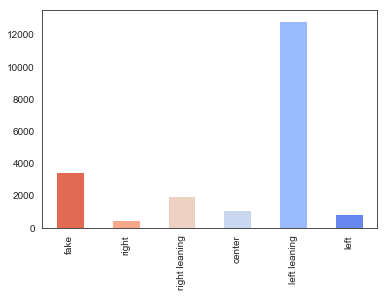

In [23]:
pd.Series(ira_as_source.c_mbfc.value_counts(), index=[mbfc_labels[i] for i in range(len(mbfc_labels))]).plot("bar")

IRA作为源的新闻，被转发多少次

In [16]:
tweets_count = all_tweets.groupby("retweeted_id").count().tweet_id

In [17]:
import sys, traceback

media_len_ret = Counter()

for _, row in tqdm(IRA_as_source.iterrows()):
    try:
        tweet_id = row["tweet_id"]
        c = int(tweets_count[tweets_count.index==tweet_id].values)
    except:
        c = 0
        # traceback.print_exc()
        
    media_len_ret[row.media_type] += c

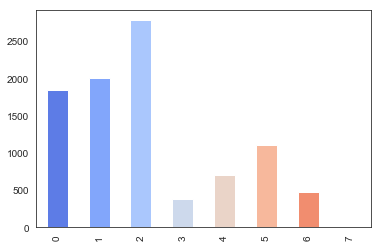

In [17]:
pd.Series(dict_media_len_ret, index=[str(i) for i in range(8)]).plot("bar")

In [18]:
URL_count = all_tweets.URL.value_counts()

## IRA所讲的故事是不是爆炸性的故事？ 

7345it [00:01, 7173.16it/s]


0    351.173469
1    944.808525
2    588.846596
3    572.043689
4    237.193947
5    544.730479
6    235.702247
7    107.436170
dtype: float64

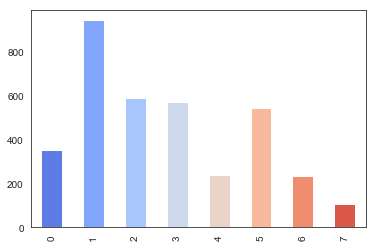

0     412980
1    1440833
2     717804
3     117841
4     384017
5     432516
6     167820
7      10099
dtype: int64

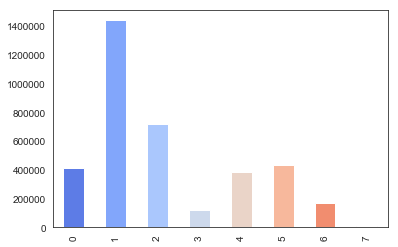

In [19]:
dict_media_len_ret = defaultdict(list)

for _, row in tqdm(IRA_tweets.iterrows()):
    c = int(URL_count[row.URL])
    dict_media_len_ret[row.media_type].append(c)

_ave = {k: sum(v) / len(v) for k, v in dict_media_len_ret.items()}
_sum = {k: sum(v) for k, v in dict_media_len_ret.items()}

d = pd.Series(_ave, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

d = pd.Series(_sum, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

7345it [00:00, 13289.07it/s]


0    216.328990
1    924.779412
2    374.208145
3    250.130435
4    483.034188
5     97.679104
6    253.585366
7    109.384615
dtype: float64

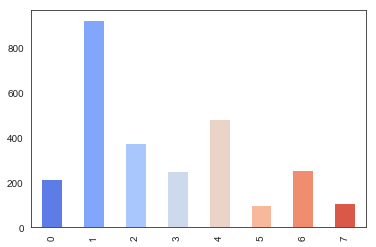

0     66413
1    125770
2     82700
3      5753
4     56515
5     26178
6     20794
7      1422
dtype: int64

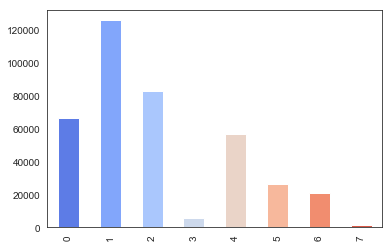

In [20]:
dict_media_len_ret = defaultdict(list)

for _, row in tqdm(IRA_tweets.iterrows()):
    if row.is_source == 1:
        c = int(URL_count[row.URL])
        dict_media_len_ret[row.media_type].append(c)

_ave = {k: sum(v) / len(v) for k, v in dict_media_len_ret.items()}
_sum = {k: sum(v) for k, v in dict_media_len_ret.items()}

d = pd.Series(_ave, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

d = pd.Series(_sum, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

为了作为对比，所有的URL又是什么情况呢？

## Loading all-users.csv ... ...

!! Already coded in the all_tweets.py for making all-users.csv

In [85]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)"
]

In [81]:
labels = [
    "fake",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",     
]

In [86]:
# all_users = pd.read_csv("data/all-users-mbfc.csv", index_col="user_id", dtype={"user_id": str})
all_users = pd.read_csv("data/all-users-nc.csv", index_col="user_id", dtype={"user_id": str})

# change the type
# f_labels = [map_labels[k] for k in map_labels]
all_users = all_users.astype({"is_IRA": int})

for label in labels:
    # print(label)
    all_users = all_users.astype({label: int,
                                  label + "_source": int,
                                  label + "_source_rate": float})

## Are IRAs the sources of fake news or influencers? 

分析IRA到底在选举期间的作用

In [87]:
IRA_users = all_users[all_users.is_IRA > 0]
len(IRA_users)

348

In [98]:
def get_big_table(_users):
    big_table = []

    for lab in labels:
        volume = _users[lab].sum() # 某种媒体上总和
        source_volume = _users[lab + "_source"].sum()
#         first_volume = _users[lab + "_first"].sum()
        source_rate = _users[_users[lab + "_source_rate"] > 0][lab + "_source_rate"].mean()
#         first_rate = _users[_users[lab + "_first_rate"] > 0][lab + "_first_rate"].mean()
        user_volume = len(_users[_users[lab]>0])
        source_user_volume = len(_users[_users[lab + "_source"]>0])
#         d = dict(Nt=volume, Ns=source_volume, Nu=user_volume,
#                  Rs=source_rate, Rf=first_rate, Nsu=source_user_volume, Nf=first_volume)

        d = dict(Nt=volume, Ns=source_volume, Nu=user_volume, Rs=source_rate, Nsu=source_user_volume)

        big_table.append(d)
    
    big_table = pd.DataFrame(big_table, index=labels)
    big_table["Pt"] = big_table["Nt"] / big_table["Nt"].sum()
    big_table["Ps"] = big_table["Ns"] / big_table["Ns"].sum()
    big_table["Ns/Nt"] = big_table["Ns"] / big_table["Nt"]
#     big_table["Nf/Nt"] = big_table["Nf"] / big_table["Nt"]
    big_table["Nt/Nu"] = big_table["Nt"] / big_table["Nu"]
    big_table["Ns/Nsu"] = big_table["Ns"] / big_table["Nsu"]

    big_table = big_table[["Nt", "Pt", "Ns", "Ns/Nt", "Ps", "Nu", "Nt/Nu", "Nsu", "Ns/Nsu"]]
#     big_table = big_table[["Nt", "Pt", "Ns", "Ns/Nt", "Ps", "Nu", "Nt/Nu", "Nsu", "Ns/Nsu"]]
#     big_table = big_table[["Nt", "Pt", "Ns", "Ps", "Ns/Nt", "Nu", "Rs", "Rf", "Nt/Nu"]]
    return big_table

In [99]:
BT = get_big_table(IRA_users)
BT.to_csv("data/IRA_BT.csv", float_format="%.2f")
BT

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,1660,0.068189,363,0.218675,0.050291,104,15.961538,34,10.676471
extreme bias (right),2882,0.118386,246,0.085357,0.034081,123,23.430894,47,5.234043
right,5273,0.216604,2797,0.530438,0.387503,172,30.656977,70,39.957143
right leaning,2164,0.088893,183,0.084566,0.025353,182,11.890110,37,4.945946
center,4274,0.175567,821,0.192092,0.113743,254,16.826772,92,8.923913
left leaning,5578,0.229132,2400,0.430262,0.332502,244,22.860656,72,33.333333
left,2403,0.098710,394,0.163962,0.054586,206,11.665049,60,6.566667
extreme bias (left),110,0.004519,14,0.127273,0.001940,44,2.500000,11,1.272727


In [100]:
BT.Nt.sum()

24344

说了这么多left的东西？究竟在说什么？

In [101]:
left_tweetids = set()

for line in tqdm(open("disk/all_IRA_tweets.json")):
    d = json.loads(line.strip())
    if d["c_mbfc"] == "left leaning":
        left_tweetids.add(d["tweetid"])

In [86]:
ira_data = pd.read_csv("data/ira-tweets-ele.csv", usecols=["tweetid", "tweet_text"], dtype=str)

In [93]:
cnt = 0
w_cnt = Counter()
with open("data/ira-left-text.txt", "w") as f:
    for i, row in tqdm(ira_data.iterrows()):
        if row["tweetid"] in left_tweetids and not row["tweet_text"].startswith("RT"):
            f.write(row["tweet_text"] + "\n")

In [102]:
BT2 = get_big_table(all_users)
BT2.to_csv("data/all_BT.csv", float_format="%.2f")
BT2

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,3315543,0.096556,1135577,0.342501,0.108179,214307,15.470997,74713,15.199189
extreme bias (right),4459235,0.129863,1270035,0.284810,0.120987,309226,14.420634,106350,11.942031
right,4553689,0.132614,1230771,0.270280,0.117247,445995,10.210179,149353,8.240685
right leaning,1169747,0.034066,391250,0.334474,0.037272,303690,3.851780,94319,4.148157
center,6938350,0.202060,2151380,0.310071,0.204947,1116700,6.213262,290324,7.410273
left leaning,8518070,0.248065,2496675,0.293103,0.237841,1383299,6.157794,425077,5.873465
left,4738758,0.138003,1638315,0.345727,0.156071,711835,6.657102,244109,6.711408
extreme bias (left),644608,0.018772,183248,0.284278,0.017457,103718,6.215006,37662,4.865594


In [103]:
def plot_compare(col_name):
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel(col_name, fontsize=15)
    print(BT[col_name])
    print(BT2[col_name])
    BT[col_name].plot.bar(width=0.3, position=1, color=ira_c, label="IRAs")
    BT2[col_name].plot.bar(width=0.3, position=0, color=all_c, label="All users")
    
    plt.xlim(-1, len(labels))
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    plt.xticks(fontsize=14, rotation=45)
    plt.legend(fontsize=14)

    col_name = col_name.replace("/", "-")
    plt.savefig("fig/{}.pdf".format(col_name), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

fake                    0.068189
extreme bias (right)    0.118386
right                   0.216604
right leaning           0.088893
center                  0.175567
left leaning            0.229132
left                    0.098710
extreme bias (left)     0.004519
Name: Pt, dtype: float64
fake                    0.096556
extreme bias (right)    0.129863
right                   0.132614
right leaning           0.034066
center                  0.202060
left leaning            0.248065
left                    0.138003
extreme bias (left)     0.018772
Name: Pt, dtype: float64


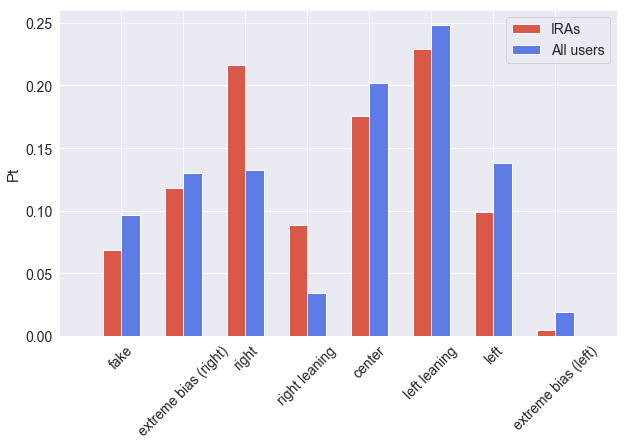

In [104]:
plot_compare("Pt")

fake                    0.050291
extreme bias (right)    0.034081
right                   0.387503
right leaning           0.025353
center                  0.113743
left leaning            0.332502
left                    0.054586
extreme bias (left)     0.001940
Name: Ps, dtype: float64
fake                    0.108179
extreme bias (right)    0.120987
right                   0.117247
right leaning           0.037272
center                  0.204947
left leaning            0.237841
left                    0.156071
extreme bias (left)     0.017457
Name: Ps, dtype: float64


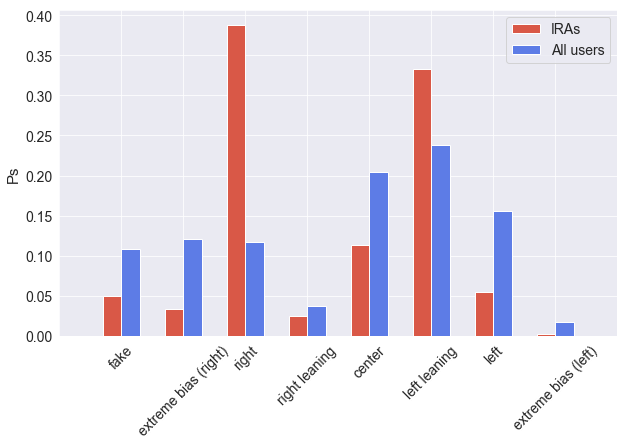

In [105]:
plot_compare("Ps")

fake                    0.218675
extreme bias (right)    0.085357
right                   0.530438
right leaning           0.084566
center                  0.192092
left leaning            0.430262
left                    0.163962
extreme bias (left)     0.127273
Name: Ns/Nt, dtype: float64
fake                    0.342501
extreme bias (right)    0.284810
right                   0.270280
right leaning           0.334474
center                  0.310071
left leaning            0.293103
left                    0.345727
extreme bias (left)     0.284278
Name: Ns/Nt, dtype: float64


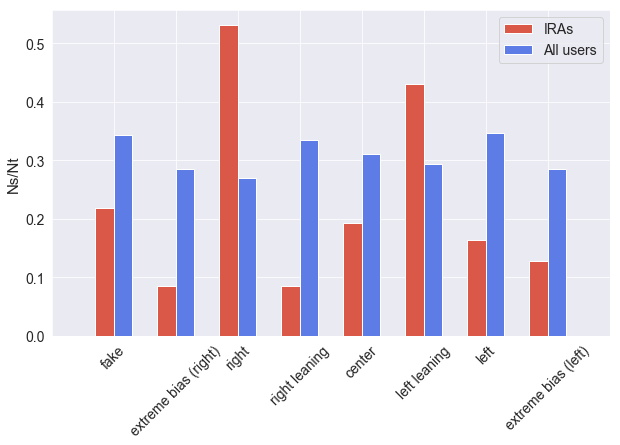

In [106]:
plot_compare("Ns/Nt")
# (BT["Rs"] / BT2["Rs"]).plot.bar()

fake                    15.961538
extreme bias (right)    23.430894
right                   30.656977
right leaning           11.890110
center                  16.826772
left leaning            22.860656
left                    11.665049
extreme bias (left)      2.500000
Name: Nt/Nu, dtype: float64
fake                    15.470997
extreme bias (right)    14.420634
right                   10.210179
right leaning            3.851780
center                   6.213262
left leaning             6.157794
left                     6.657102
extreme bias (left)      6.215006
Name: Nt/Nu, dtype: float64


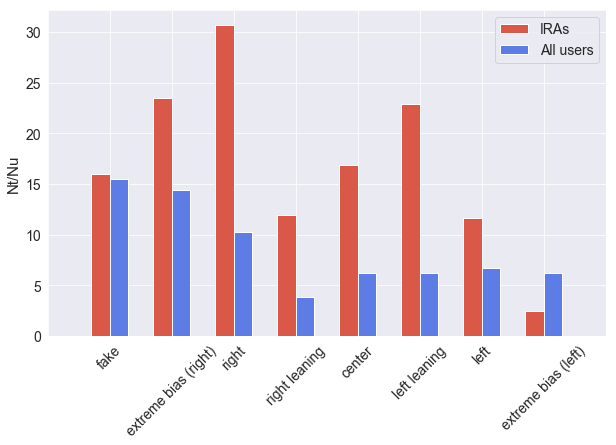

In [107]:
plot_compare("Nt/Nu")

fake                    10.676471
extreme bias (right)     5.234043
right                   39.957143
right leaning            4.945946
center                   8.923913
left leaning            33.333333
left                     6.566667
extreme bias (left)      1.272727
Name: Ns/Nsu, dtype: float64
fake                    15.199189
extreme bias (right)    11.942031
right                    8.240685
right leaning            4.148157
center                   7.410273
left leaning             5.873465
left                     6.711408
extreme bias (left)      4.865594
Name: Ns/Nsu, dtype: float64


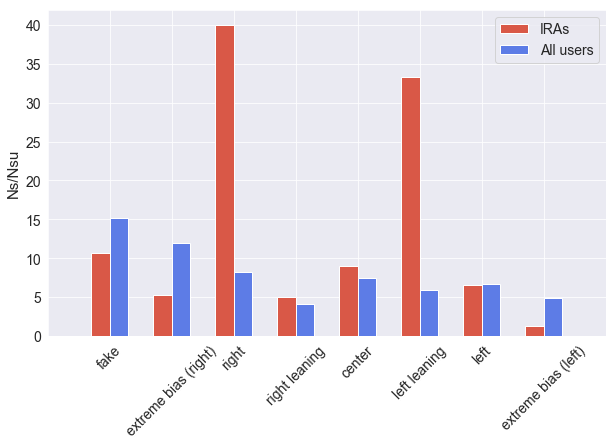

In [108]:
plot_compare("Ns/Nsu")

## IRAs as sources

1. 看看每个用户发布的量
2. 找到top sources看看交集

结论：IRA从量上来看伪装非常普通的用户！

用户发帖量的分布 或 用户发source tweets的分布

fake


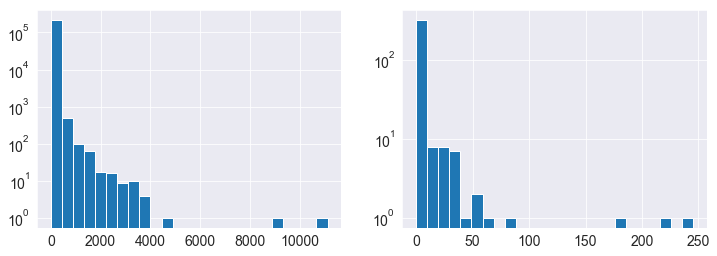

extreme bias (right)
right
right leaning
center
left leaning
left
extreme bias (left)


In [92]:
sns.set_style("darkgrid")

for lab in labels:
    print(lab)
    
    plt.figure(figsize=(12, 4))
    
    ax = plt.subplot(121)
    _users = all_users[all_users[lab] > 0]
    _users[lab].hist(ax=ax, bins=25)
    # USER_TABLE[lab] = _users[lab].describe()
    
    plt.yscale("log")
    # plt.xscale("log")
    
    ax = plt.subplot(122)
    IRA_users[lab].hist(ax=ax, bins=25)
    # IRA_USER_TABLE[lab] = IRA_users[lab].describe()
    
    plt.yscale("log")
    
    if lab == "fake":
        plt.show()
    plt.close()

### 从量的角度看IRA的确不高，甚至低于一般的用户

In [199]:
set_IRAs_users = set()

for user_id, row in IRA_users.iterrows():
    set_IRAs_users.add(user_id)
    
# print(len(set_IRAs_users))

In [200]:
top_num = 1000

for lab in mbfc_labels:
    top_sources = set(all_users[lab].sort_values(ascending=False).head(top_num).index)
    # print(top_sources)
    len_intersection = len(top_sources & set_IRAs_users)
    print(lab, len_intersection)

fake 0
right 2
right leaning 3
center 0
left leaning 2
left 0


In [201]:
top_num = 1000

for lab in mbfc_labels:
    top_sources = set(all_users[lab + "_source"].sort_values(ascending=False).head(top_num).index)
    # print(top_sources)
    len_intersection = len(top_sources & set_IRAs_users)
    print(lab, len_intersection)

fake 1
right 1
right leaning 1
center 0
left leaning 3
left 0


## IRA as influencers

分析IRA是不是影响力比较大的节点

In [22]:
# 方向 both undir out in

import graph_tool.all as gt

def build_CI_rank(graph_file):
    rst = {}
    g = gt.load_graph(graph_file)
    user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
    rst["out_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i for i, d in enumerate(st_user_CI)}
    rst["out_id"] = st_user_CI
    rst["out_rank"] = rank
    
#     user_CI = {g.vp.id[v]: g.vp.CI_undir[v] for v in g.vertices()}
#     rst["undir_CI"] = user_CI
#     st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
#     rst["undir_id"] = st_user_CI
    
#     user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
#     rst["both_CI"] = user_CI
#     st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
#     rst["both_id"] = st_user_CI

    user_CI = {g.vp.id[v]: g.vp.CI_in[v] for v in g.vertices()}
    rst["in_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i for i, d in enumerate(st_user_CI)}
    rst["in_id"] = st_user_CI
    rst["in_rank"] = rank
    
    return rst

In [23]:
def get_cdf_pdf(data, mini=0, maxi=0, step=0, norm=True, scale=False):
    if scale:
        data = data.apply(np.log10)
    
    if maxi == 0:
        maxi = data.max()
    if step == 0:
        try:
            step = int((maxi - mini) / 50)
            if step == 0:
                step = 1
        except:
            step = 1
            
    print(mini, maxi, step)
    x = np.arange(mini, maxi, step, dtype=int)
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    x = pd.Series(x)
    cdf = pd.Series(cdf)
    pdf = pd.Series(pdf)
    
    return x, cdf, pdf

348


fake_out                      206/187577
fake_in                        53/187577
extreme bias (right)_out      249/267480
extreme bias (right)_in         4/267480
right_out                     195/381290
right_in                        5/381290
right leaning_out             393/254200
right leaning_in                2/254200
center_out                    559/974603
center_in                     110/974603
left leaning_out            1091/1182125
left leaning_in              662/1182125
left_out                     1889/586267
left_in                      1153/586267
extreme bias (left)_out       3757/83660
extreme bias (left)_in        6268/83660
dtype: object

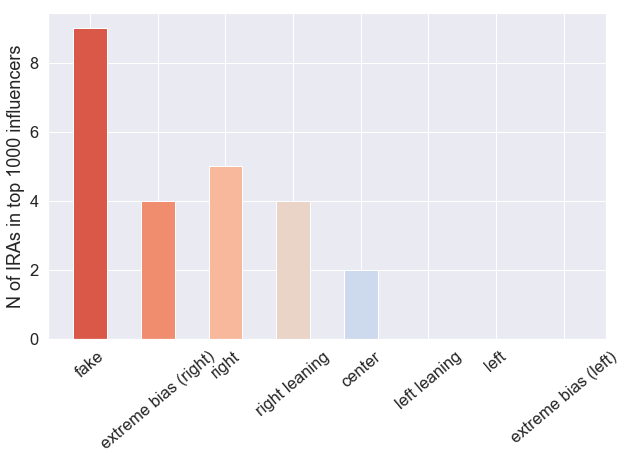

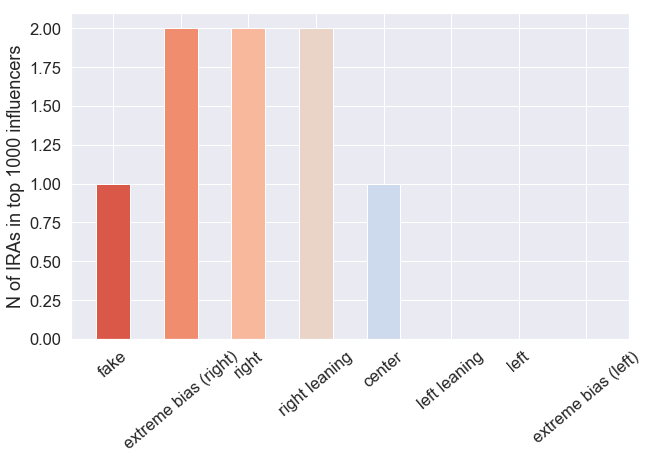

fake out pvalue = 0.146
extreme bias (right) out pvalue = 0.192
right out pvalue = 0.584
right leaning out pvalue = 0.958
center out pvalue = 0.842
left leaning out pvalue = 0.554
left out pvalue = 1.000
extreme bias (left) out pvalue = 1.000


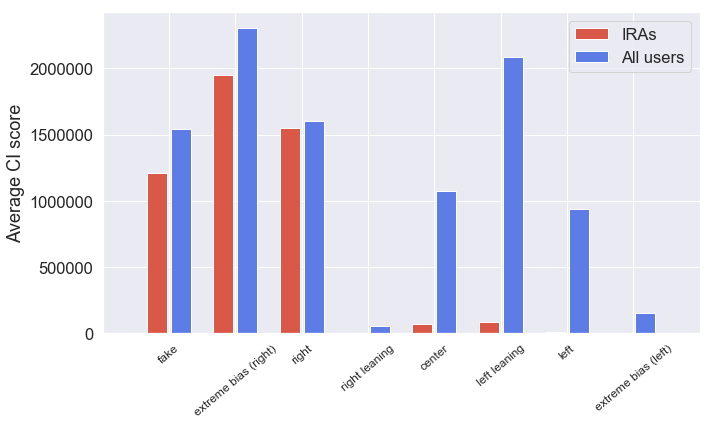

fake in pvalue = 0.038
extreme bias (right) in pvalue = 0.016
right in pvalue = 0.051
right leaning in pvalue = 0.011
center in pvalue = 0.000
left leaning in pvalue = 0.000
left in pvalue = 0.000
extreme bias (left) in pvalue = 0.618


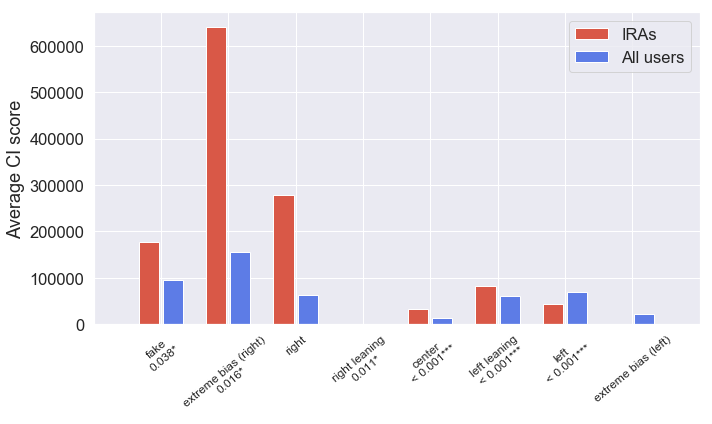

In [26]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)"
]

# all_users = pd.read_csv("data/all-users-mbfc.csv", index_col="user_id", dtype={"user_id": str})
users = pd.read_csv("data/all-users-nc.csv", index_col="user_id",
                    usecols =["user_id", "is_IRA"], dtype={"user_id": str, "is_IRA": int})
IRA_users = users[users.is_IRA > 0]
print(len(IRA_users))

top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)
dict_ira_rank = {}

for label in tqdm(labels):
#     print(label, "...")
    rst = build_CI_rank("disk/network/{}_nc.gt".format(label))
#     for dire in ["out", "undir", "both", "in"]:
    for dire in ["out", "in"]:
#         print(label, dire, "...")
        user_CI = rst[dire + "_CI"]
        rank = rst[dire + "_rank"]
        ira_rank = {}
        # top list
        set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

        set_source_users = set()
        IRA_CI = []
        for user_id, row in IRA_users.iterrows():
            set_source_users.add(user_id)
            try:
                IRA_CI.append(user_CI[user_id])
                ira_rank[user_id] = rank[user_id]
            except:
                pass
            
#         print("---- IRA rank ----")
        ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
#         print(ira_rank)
        
        len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
        # print("参与人数：", len(IRA_CI), len(sort_user_CI))
        IRA_CI = pd.Series(IRA_CI)
        IRA_CI_sum = IRA_CI.sum()
        
        # 总体排名
#         print("IRA sum", IRA_CI_sum, np.log(IRA_CI_sum))
        for i, d in enumerate(rst[dire + "_id"]):
            if d[1] <= IRA_CI_sum:
                break
        dict_ira_rank[label + "_" + dire] = "{}/{}".format(i+1, len(user_CI))
                
        
#         IRA_CI_mean = IRA_CI.mean()
        IRA_CI_mean = IRA_CI.mean()
        all_CI = pd.Series(list(user_CI.values()))
#         all_CI_mean = all_CI.mean()
        all_CI_mean = all_CI.mean()

        dict_CI[label][dire + "_IRA"] = IRA_CI_mean
        dict_CI[label][dire + "_All users"] = all_CI_mean
        dict_CI[label][dire + "_IRA dist"] = IRA_CI
        dict_CI[label][dire + "_All dist"] = all_CI
        
# print(dict_CI)
compare_CI_value = pd.DataFrame(dict_CI).transpose()
# compare_CI_value
display(pd.Series(dict_ira_rank))


# 交集
def plot_corr(cor, dire):
    # display(cor)
    plt.figure(figsize=(10, 6))
    x = range(len(labels))
    for i in x:
        plt.bar(i, cor[dire + "_" + labels[i]], width=0.5, 
                  color=sns.color_palette("coolwarm", len(labels))[len(labels) - 1 - i])
    plt.xticks(x, labels, rotation=40)
    plt.ylabel('N of IRAs in top {} influencers'.format(top_num))
    plt.savefig("fig/size-of-inter-{}-{}-nc.pdf".format(top_num, dire),
                  dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    plot_corr(len_intersection, dire)

    
from scipy.stats import ks_2samp

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel("Average CI score")
    compare_CI_value[dire + "_IRA"].plot.bar(width=0.3, position=1.1, 
                                     color=ira_c, label="IRAs")
    compare_CI_value[dire + "_All users"].plot.bar(width=0.3, position=-0.1, 
                                     color=all_c, label="All users")
    
    # 显著性检验    
    _ticks = []
    for label in labels:
        d = dict_CI[label]
        pvalue = ks_2samp(d[dire + "_IRA dist"], d[dire + "_All dist"])[1]
        print(label, dire, "pvalue = {:.3f}".format(pvalue))
        if pvalue < 0.001:
            _ticks.append(label + "\n< 0.001***")

        elif pvalue < 0.01:
            _ticks.append("{}\n{:.3f}**".format(label, pvalue))
        elif pvalue < 0.05:
            _ticks.append("{}\n{:.3f}*".format(label, pvalue))
        else:
            _ticks.append(label) 
    
    plt.xticks(range(len(labels)), _ticks, rotation=40, fontsize=12)
    plt.xlim(-1, len(labels))
    plt.legend()

    plt.tight_layout()
    plt.savefig("fig/CI_{}_nc.pdf".format(dire), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


0 10.126817885489466 1
0 7.5048897851411445 1
CI score
 category:fake
direction:out


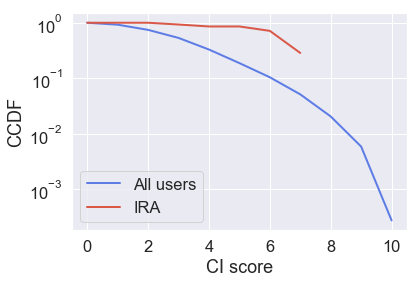

0 8.164498141654516 1
0 6.8090354169436464 1
CI score
 category:fake
direction:in


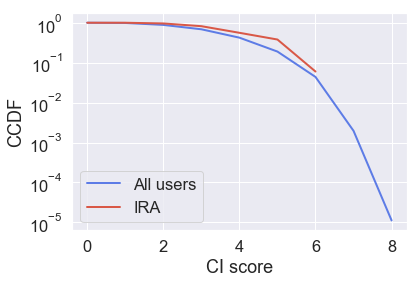

0 10.594088174107524 1
0 7.978304348559624 1
CI score
 category:extreme bias (right)
direction:out


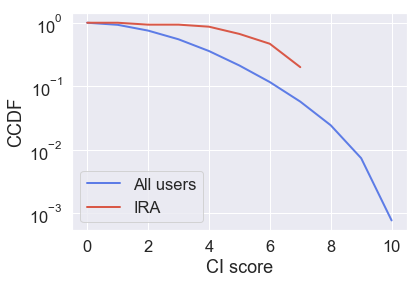

0 7.983906575912224 1
0 7.426365935456665 1
CI score
 category:extreme bias (right)
direction:in


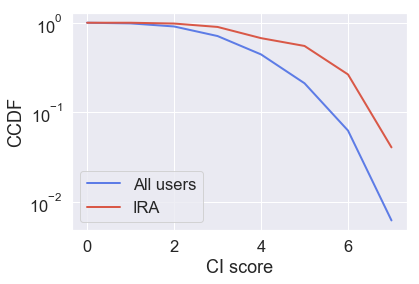

0 10.804296348274034 1
0 7.974927992149269 1
CI score
 category:right
direction:out


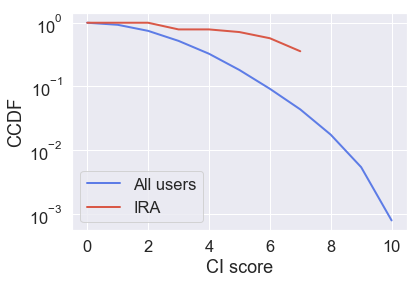

0 7.738134540706351 1
0 7.216350299683929 1
CI score
 category:right
direction:in


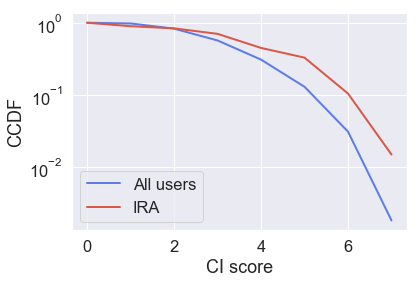

0 9.611782837843021 1
0 4.902677211134544 1
CI score
 category:right leaning
direction:out


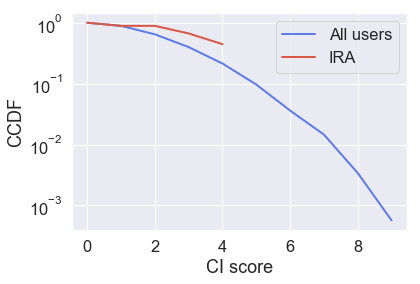

0 5.487811222633905 1
0 5.074293363890901 1
CI score
 category:right leaning
direction:in


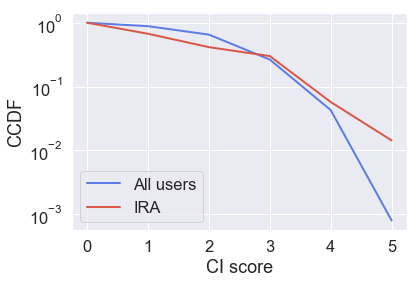

0 11.374527361082558 1
0 6.902351819413946 1
CI score
 category:center
direction:out


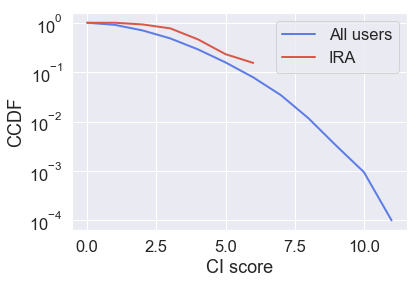

0 7.5890040436314115 1
0 6.45549627010525 1
CI score
 category:center
direction:in


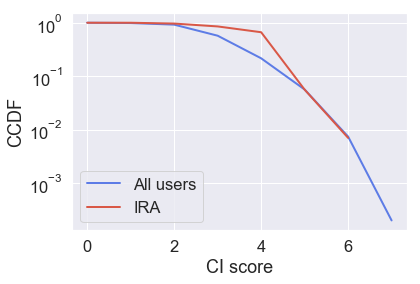

0 11.498302034047779 1
0 7.118847936136031 1
CI score
 category:left leaning
direction:out


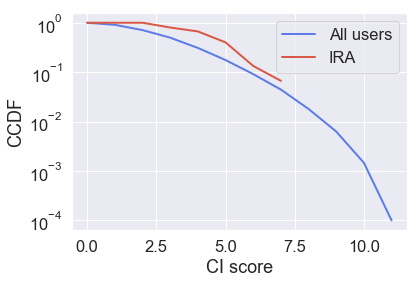

0 8.327496121160419 1
0 6.517028880270624 1
CI score
 category:left leaning
direction:in


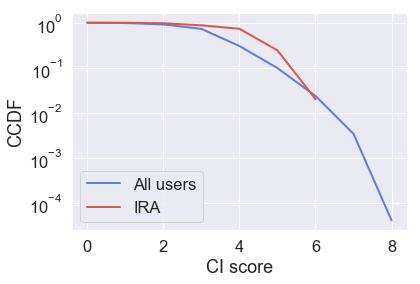

0 10.6681341661706 1
0 5.879676080952016 1
CI score
 category:left
direction:out


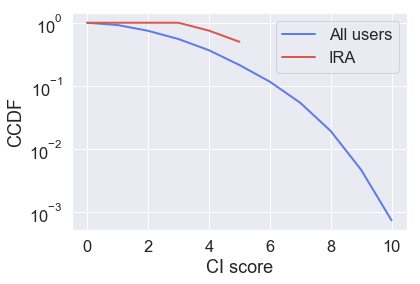

0 8.159407214678305 1
0 6.123979624691392 1
CI score
 category:left
direction:in


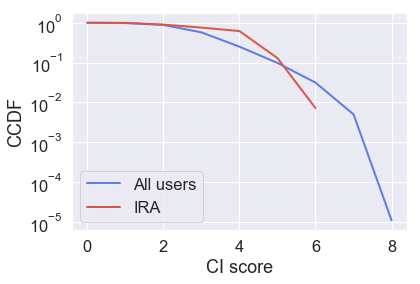

0 9.350606579293581 1
0 -inf 1


ValueError: Maximum allowed size exceeded

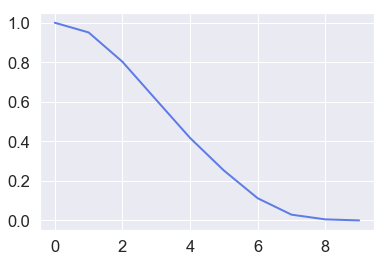

In [25]:
for label in labels:
    for dire in ["out", "in"]:
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_All dist"], scale=True) 
        plt.plot(x, cdf, color=all_c, label="All users", lw=2)
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_IRA dist"], scale=True)
        plt.plot(x, cdf, color=ira_c, label="IRA", lw=2)
        print("CI score\n category:{}\ndirection:{}".format(label, dire))
        plt.yscale("log")
        plt.ylabel("CCDF"); plt.xlabel("CI score")
        plt.legend()
        plt.show(); plt.close()

In [5]:
labels = [
    "fake",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",     
]

users = pd.read_csv("data/all-users-mbfc.csv", index_col="user_id",
                    usecols =["user_id", "is_IRA"], dtype={"user_id": str, "is_IRA": int})
IRA_users = users[users.is_IRA > 0]
print(len(IRA_users))


top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)

for label in labels:
    print(label, "...")
    rst = build_CI_rank("disk/network/{}_fc.gt".format(label))
#     for dire in ["out", "undir", "both", "in"]:
    for dire in ["out", "in"]:
        user_CI = rst[dire + "_CI"]
        set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])
        
        set_source_users = set()
        IRA_CI = []
        for user_id, row in IRA_users.iterrows():
            set_source_users.add(user_id)
            try:
                IRA_CI.append(user_CI[user_id])
            except:
                pass

        len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
        # print("参与人数：", len(IRA_CI), len(sort_user_CI))
        IRA_CI = pd.Series(IRA_CI)
        IRA_CI_mean = IRA_CI.mean()
        all_CI = pd.Series(list(user_CI.values()))
        all_CI_mean = all_CI.mean()

        dict_CI[label][dire + "_IRA"] = IRA_CI_mean
        dict_CI[label][dire + "_All users"] = all_CI_mean
        dict_CI[label][dire + "_IRA dist"] = IRA_CI
        dict_CI[label][dire + "_All dist"] = all_CI
        
# print(dict_CI)
compare_CI_value = pd.DataFrame(dict_CI).transpose()
# compare_CI_value

def plot_corr(cor, dire):
    # display(cor)
    plt.figure(figsize=(8, 6))
    x = range(len(labels))
    for i in x:
        plt.bar(i, cor[dire + "_" + labels[i]], width=0.5, color=sns.color_palette("coolwarm", len(labels))[len(labels) - 1 - i])
    plt.xticks(x, labels, rotation=40)
    plt.ylabel('N of IRAs in top {} influencers'.format(top_num))
    plt.savefig("fig/size-of-inter-{}-{}-fc.pdf".format(top_num, dire), dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    plot_corr(len_intersection, dire)

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel("Average CI score")
    compare_CI_value[dire + "_IRA"].plot.bar(width=0.3, position=1.1, 
                                     color=ira_c, label="IRAs")
    compare_CI_value[dire + "_All users"].plot.bar(width=0.3, position=-0.1, 
                                     color=all_c, label="All users")
    
    
    rst = ks_2samp(d[dire + "_IRA dist"], d[dire + "_All dist"])
    # print('KS ->', rst)
    
    _ticks = []
    for label in labels:
        d = dict_CI[label]
        pvalue = ks_2samp(d[dire + "_IRA dist"], d[dire + "_All dist"])[1]
        print(label, dire, "pvalue = {:.3f}".format(pvalue))
        if pvalue < 0.001:
            _ticks.append(label + "\n< 0.001***")

        elif pvalue < 0.01:
            _ticks.append("{}\n{:.3f}**".format(label, pvalue))
        elif pvalue < 0.05:
            _ticks.append("{}\n{:.3f}*".format(label, pvalue))
        else:
            _ticks.append(label) 
    
    plt.xticks(range(len(labels)), _ticks, rotation=40, fontsize=12)
    plt.xlim(-1, len(labels))
    plt.legend()

    plt.tight_layout()
    plt.savefig("fig/CI_{}_fc.pdf".format(dire), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

391
fake ...


KeyboardInterrupt: 

162 421148
fake ...
black ...
red ...
orange ...


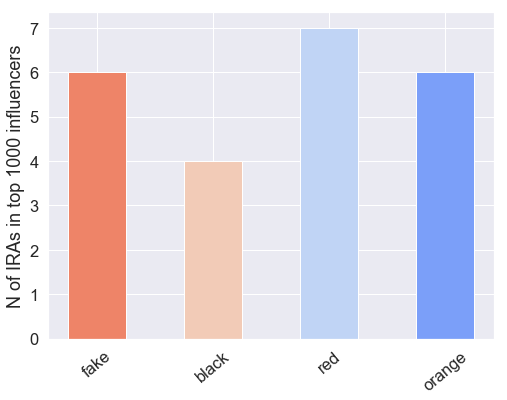

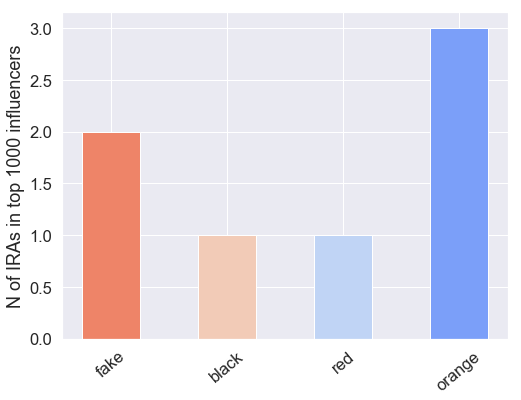

fake out pvalue = 0.165303
black out pvalue = 0.455496
red out pvalue = 0.152962
orange out pvalue = 0.353242


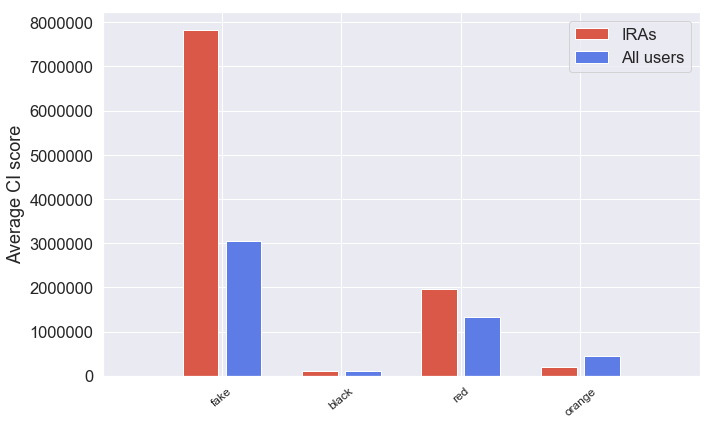

fake in pvalue = 0.005710
black in pvalue = 0.154437
red in pvalue = 0.005038
orange in pvalue = 0.049676


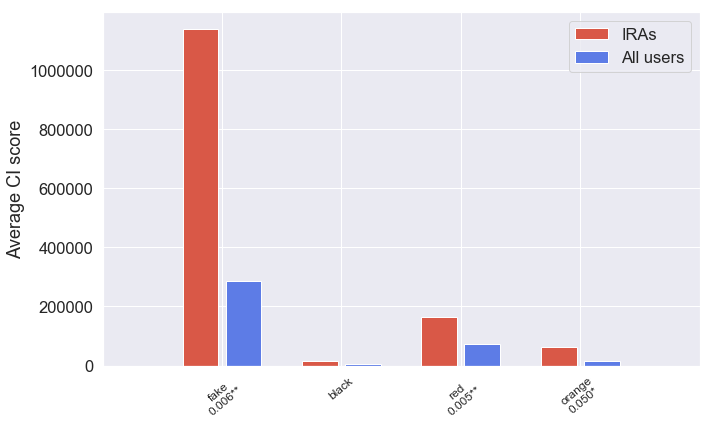

In [95]:
labels = [
    "fake",
    "black",
    "red",
    "orange",
]

users = pd.read_csv("data/all-users-sf.csv", index_col="user_id",
                    usecols =["user_id", "is_IRA"], dtype={"user_id": str, "is_IRA": int})
IRA_users = users[users.is_IRA > 0]
print(len(IRA_users), len(users))


top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)

for label in labels:
    print(label, "...")
    rst = build_CI_rank("disk/network/{}_sf.gt".format(label))
#     for dire in ["out", "undir", "both", "in"]:
    for dire in ["out", "in"]:
        user_CI = rst[dire + "_CI"]
        set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])
        
        set_source_users = set()
        IRA_CI = []
        for user_id, row in IRA_users.iterrows():
            set_source_users.add(user_id)
            try:
                IRA_CI.append(user_CI[user_id])
            except:
                pass

        len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
        # print("参与人数：", len(IRA_CI), len(sort_user_CI))
        IRA_CI = pd.Series(IRA_CI)
        IRA_CI_mean = IRA_CI.mean()
        all_CI = pd.Series(list(user_CI.values()))
        all_CI_mean = all_CI.mean()

        dict_CI[label][dire + "_IRA"] = IRA_CI_mean
        dict_CI[label][dire + "_All users"] = all_CI_mean
        dict_CI[label][dire + "_IRA dist"] = IRA_CI
        dict_CI[label][dire + "_All dist"] = all_CI
        
# print(dict_CI)
compare_CI_value = pd.DataFrame(dict_CI).transpose()
# compare_CI_value

def plot_corr(cor, dire):
    # display(cor)
    plt.figure(figsize=(8, 6))
    x = range(len(labels))
    for i in x:
        plt.bar(i, cor[dire + "_" + labels[i]], width=0.5, color=sns.color_palette("coolwarm", len(labels))[len(labels) - 1 - i])
    plt.xticks(x, labels, rotation=40)
    plt.ylabel('N of IRAs in top {} influencers'.format(top_num))
    plt.savefig("fig/size-of-inter-{}-{}-sf.pdf".format(top_num, dire), dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    plot_corr(len_intersection, dire)
    
sns.set_style("darkgrid")

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel("Average CI score")
    compare_CI_value[dire + "_IRA"].plot.bar(width=0.3, position=1.1, 
                                     color=ira_c, label="IRAs")
    compare_CI_value[dire + "_All users"].plot.bar(width=0.3, position=-0.1, 
                                     color=all_c, label="All users")
    
    
    rst = ks_2samp(d[dire + "_IRA dist"], d[dire + "_All dist"])
    # print('KS ->', rst)
    
    _ticks = []
    for label in labels:
        d = dict_CI[label]
        pvalue = ks_2samp(d[dire + "_IRA dist"], d[dire + "_All dist"])[1]
        print(label, dire, "pvalue = {:.6f}".format(pvalue))
        if pvalue < 0.001:
            _ticks.append(label + "\n< 0.001***")

        elif pvalue < 0.01:
            _ticks.append("{}\n{:.3f}**".format(label, pvalue))
        elif pvalue < 0.05:
            _ticks.append("{}\n{:.3f}*".format(label, pvalue))
        else:
            _ticks.append(label) 
    
    plt.xticks(range(len(labels)), _ticks, rotation=40, fontsize=12)
    plt.xlim(-1, len(labels))
    plt.legend()

    plt.tight_layout()
    plt.savefig("fig/CI_{}_sf.pdf".format(dire), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Who is collective influencers?

fake news最有影响力的用户

TOP 100 CIs!!

In [109]:
db_uid_name = {}
for line in tqdm(open("disk/user_info.json")):
    w = line.strip().split(",")
    db_uid_name[w[0]] = {
        "name": w[1],
        "fol": w[2],
        "fri": w[3],
    }

In [111]:
g = gt.load_graph("disk/network/fake_nc.gt")
map_user_id = {i: g.vp.id[v] for i, v in enumerate(g.vertices())}

In [114]:
top_user_list = {}

# both
user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)

cnt = 0
top_users = []
for user_id, v in st_user_CI:
    cnt += 1
    # print(map_user_id[v], g.vp.CI_both[v])
    # print(user_id, db_user_name[user_id], v)
    # print(db_user_name[user_id], v)
    
    top_users.append(db_uid_name[user_id]["name"])
    if cnt >= 100:
        break

top_user_list["Top CI(both)"] = top_users

In [115]:
# out
user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)

cnt = 0
top_users = []
for user_id, v in st_user_CI:
    cnt += 1
    # print(map_user_id[v], g.vp.CI_both[v])
    # print(user_id, db_user_name[user_id], v)
    # print(db_user_name[user_id], v)
    
    top_users.append(db_uid_name[user_id]["name"])
    if cnt >= 100:
        break
        
top_user_list["Top CI(out)"] = top_users

In [8]:
d = pd.read_csv("data/CI_dyn.txt", dtype=str)
d = d.astype({"source": int, "CI_dynamics": int})

In [9]:
d["ave_CI_dyn"] = d["CI_dynamics"] / d["source"]

In [11]:
uids = d.sort_values("CI_dynamics", ascending=False).user_id
top_users = []

for user_id in uids:
    top_users.append(db_user_name[user_id])
    print(user_id, db_user_name[user_id])
    if len(top_users) >= 100:
        break
        
top_user_list["Top CI dynamics"] = top_users

825501626 VivaLaAmes
18643437 PrisonPlanet
109065990 RealAlexJones
19211550 gatewaypundit
17980523 mitchellvii
4855687055 Lagartija_Nix
707278892801765377 TruthFeedNews
18856867 zerohedge
2242085304 RickRWells
14669951 DRUDGE_REPORT
4831603043 TPoliticmanager
3022045469 ThePatriot143
3914047581 Italians4Trump
14505245 infowars
25073877 realDonaldTrump
704034081898668032 Miami4Trump
1575689569 BigStick2013
39344374 DonaldJTrumpJr
4510755552 _Makada_
2728672957 KitDaniels1776
1564676498 surfermom77
19173608 JayS2629
3270559782 MONAKatOILS
567626521 jko417
122455671 TeaPartyOrg
2217181338 conserv_tribune
4717892303 V_of_Europe
1494835716 AIIAmericanGirI
27404671 SavageNation
358545917 Cernovich
4786763677 MOVEFORWARDHUGE
975217231 JrcheneyJohn
53297881 redflagnews
2845849081 ARnews1936
999453985 BlissTabitha
4165642155 ConstanceQueen8
4584443975 TRUMP_PREZ
72882689 SonofLiberty357
2417844248 _Proud_American
788571666 EjHirschberger
2164876369 RepStevenSmith
16589206 wikileaks
779739206339

In [181]:
uids = d.sort_values("ave_CI_dyn", ascending=False).user_id
top_users = []

for user_id in uids:
    top_users.append(db_user_name[user_id])
    if len(top_users) >= 100:
        break
        
top_user_list["Top average CI dynamics"] = top_users

In [182]:
d = pd.DataFrame(top_user_list)
d.index += 1
d.to_csv("data/top_users.csv")

## IRAs as supporters 

In [ ]:
from collections import Counter
sns.color_palette("RdBu", n_colors=7)

count = Counter(first_opinion)
print(count)

label = ["pro-hillary", "pro-trump"]
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('First source', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(staters_opinion)
print(count)

plt.subplot(132)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('source', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(other_opinion)
print(count)

plt.subplot(133)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('non-source', fontsize=15)
# plt.ylabel('N of fake sources', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.savefig("fig/support.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Making URL 

In [117]:
URL_counts = all_tweets.URL.value_counts()

In [32]:
# cnt = 0

set_URL = set()

for URL in URL_counts.index:
    # print(URL)
    if URL.endswith("/"):
        URL = URL[:-1]
    if URL in set_URL:
        print(URL)
    set_URL.add(URL)
        
print(len(set_URL))

NameError: name 'URL_counts' is not defined

In [125]:
len(URL_counts)

2524061

## 网络分析

分析每种媒体网络中IRA的节点数量，相关边的数量，平均度，最大度等。

In [184]:
from fake_identify import Are_you_IRA

putin = Are_you_IRA()


def get_G_char(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    k = G.number_of_edges() / G.number_of_nodes()

    out_d = pd.Series([k[1] for k in G.out_degree()])
    ave_out_d = out_d.mean()
    std_out_d = out_d.std() / k
    max_out_d = max(out_d)

    in_d = pd.Series([k[1] for k in G.in_degree()])
    ave_in_d = in_d.mean()
    std_in_d = in_d.std() / k
    max_in_d = max(in_d)

    rst = {
        "N nodes": n_nodes,
        "N edges": n_edges,
        "<k>": k,
        "std(k_out) / <k>": ave_out_d,
        "std(k_in) / <k>": ave_in_d,
        "max(k_out)": max_out_d,
        "max(k_in)": max_in_d,
    }        
    
    return rst


def get_G_char_IRA(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    nodes = [uid for uid in putin.IRA_user_set if G.has_node(uid)]
    
    n_nodes = len(nodes)
    out_d = pd.Series([G.out_degree(n) for n in nodes])
    ave_k_out = out_d.sum() / n_nodes
    std_k_out = out_d.std() / ave_k_out
    max_out_d = max(out_d)

    in_d = pd.Series([G.in_degree(n) for n in nodes])
    ave_k_in = in_d.sum() / n_nodes
    std_k_in = in_d.std() / ave_k_in
    max_in_d = max(in_d)
    
    rst = {
        "N nodes": n_nodes,
        "<k_out>": ave_k_out,
        "<k_in>": ave_k_in,
        "std(k_out) / <k_out>": std_k_out,
        "std(k_in) / <k_in>": std_k_in,
        "max(k_out)": max_out_d,
        "max(k_in)": max_in_d,
    } 
    return rst


In [112]:
networks_char = {}

for i in range(len(map_labels)):
    category = map_labels[str(i)]
    rst = get_G_char("disk/network_{}.gpickle".format(category))
    networks_char[category] = rst

disk/network_fake.gpickle ...
disk/network_extreme bias (right).gpickle ...
disk/network_right.gpickle ...
disk/network_right leaning.gpickle ...
disk/network_center.gpickle ...
disk/network_left leaning.gpickle ...
disk/network_left.gpickle ...
disk/network_extreme bias (left).gpickle ...


In [113]:
networks_char = pd.DataFrame(networks_char).transpose()
networks_char = networks_char[["N nodes", "N edges", "<k>", "std(k_out) / <k>", "std(k_in) / <k>", "max(k_out)", "max(k_in)"]]

networks_char.to_csv("data/table_all_network.csv", float_format="%.1f")
networks_char

,N nodes,N edges,<k>,std(k_out) / <k>,std(k_in) / <k>,max(k_out),max(k_in)
fake,187581.0,1328109.0,7.080189,32.504332,2.519126,45305.0,1234.0
extreme bias (right),268065.0,1904334.0,7.104001,38.048120,2.780742,60622.0,642.0
right,381854.0,2130544.0,5.579473,48.089533,2.772111,87216.0,546.0
right leaning,254212.0,631148.0,2.482762,50.028980,1.821710,38981.0,147.0
center,975312.0,2960757.0,3.035702,122.764473,2.786870,257559.0,551.0
left leaning,1183403.0,4284667.0,3.620632,74.030897,3.498212,172026.0,913.0
left,587553.0,2077901.0,3.536534,50.410517,3.593570,59749.0,797.0
extreme bias (left),83669.0,299408.0,3.578482,33.826937,2.517140,23208.0,659.0


In [185]:
networks_char = {}

for i in range(len(map_labels)):
    category = map_labels[str(i)]
    rst = get_G_char_IRA("disk/network_{}.gpickle".format(category))
    networks_char[category] = rst

disk/network_fake.gpickle ...
disk/network_extreme bias (right).gpickle ...
disk/network_right.gpickle ...
disk/network_right leaning.gpickle ...
disk/network_center.gpickle ...
disk/network_left leaning.gpickle ...
disk/network_left.gpickle ...
disk/network_extreme bias (left).gpickle ...


/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


In [186]:
networks_char = pd.DataFrame(networks_char).transpose()
networks_char = networks_char[["N nodes", "<k_out>", "<k_in>", "std(k_out) / <k_out>", "std(k_in) / <k_in>", "max(k_out)", "max(k_in)"]]
networks_char

networks_char.to_csv("data/table_IRA_network.csv", float_format="%.1f")
networks_char

,N nodes,<k_out>,<k_in>,std(k_out) / <k_out>,std(k_in) / <k_in>,max(k_out),max(k_in)
fake,69.0,27.811594,9.884058,2.862679,1.826853,379.0,114.0
extreme bias (right),98.0,20.551020,10.255102,3.867525,2.184276,558.0,149.0
right,97.0,28.030928,7.701031,4.151999,2.127529,752.0,118.0
right leaning,83.0,5.072289,1.855422,3.661605,1.554630,107.0,24.0
center,170.0,4.482353,3.776471,6.512995,1.798196,310.0,71.0
left leaning,168.0,7.559524,3.000000,4.500030,1.393359,270.0,44.0
left,141.0,3.198582,3.978723,5.901482,1.033877,153.0,33.0
extreme bias (left),35.0,0.000000,1.885714,NaN,0.850932,0.0,8.0


## 分析IRA的outlets

In [3]:
all_tweets.head()

,URL,dt,hostname,is_IRA,is_first,is_source,media_type,retweeted_id,tweet_id,user_id
0,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:49:57,newsweek.com,0,1,1,5,0,785628468746727424,215207998
1,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:09,newsweek.com,0,0,0,5,785628468746727424,785628515991302144,20634939
2,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:10,newsweek.com,0,0,0,5,785628468746727424,785628519703326722,26378513
3,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:16,newsweek.com,0,0,0,5,785628468746727424,785628546114859008,445966346
4,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:23,newsweek.com,0,0,0,5,785628468746727424,785628574388621312,754104364164345860


In [13]:
ira_tweets = all_tweets[all_tweets.is_IRA==1]

for i in range(len(map_labels)):
    lab = map_labels[str(i)]
    print("\n======== {} ========".format(lab))
    _tweets = ira_tweets[ira_tweets.media_type==str(i)]
    print(_tweets["hostname"].value_counts())


======== fake ========
truthfeed.com              528
thegatewaypundit.com       129
therightscoop.com          113
conservativetribune.com    102
infowars.com                55
rickwells.us                42
zerohedge.com               29
therealstrategy.com         27
thepoliticalinsider.com     27
departed.co                 26
thefederalistpapers.org     25
thetruthdivision.com        18
clashdaily.com              16
usapoliticsnow.com          15
redflagnews.com             14
teaparty.org                 9
thehill.com                  1
Name: hostname, dtype: int64

======== extreme bias (right) ========
dailycaller.com          543
breitbart.com            356
freebeacon.com           141
americanthinker.com       92
newsninja2012.com         77
pjmedia.com               69
truepundit.com            62
100percentfedup.com       37
endingthefed.com          32
wnd.com                   19
westernjournalism.com     19
hannity.com               18
ilovemyfreedom.org        17
new

In [9]:
from urllib.parse import urlparse
from tqdm import tqdm_notebook as tqdm

cnt = 0
for i, tweet in tqdm(all_tweets.iterrows()):
    if urlparse(tweet["URL"]) != tweet["hostname"]:
        cnt += 1
        print(urlparse(tweet["URL"]).hostname, tweet["hostname"])
        if cnt > 100:
            break
        
print(cnt)

www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newsweek.com newsweek.com
www.newswe

In [17]:
all_tweets[all_tweets.tweet_id=="775062649822253056"]

,URL,dt,hostname,is_IRA,is_first,is_source,media_type,retweeted_id,tweet_id,user_id
10423703,http://www.thegatewaypundit.com/2016/09/breaki...,2016-09-11 15:05:10,thegatewaypundit.com,0,0,1,0,0,775062649822253056,4826510725


In [ ]:
hostname = urlparse(url).hostname